<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Optics/spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

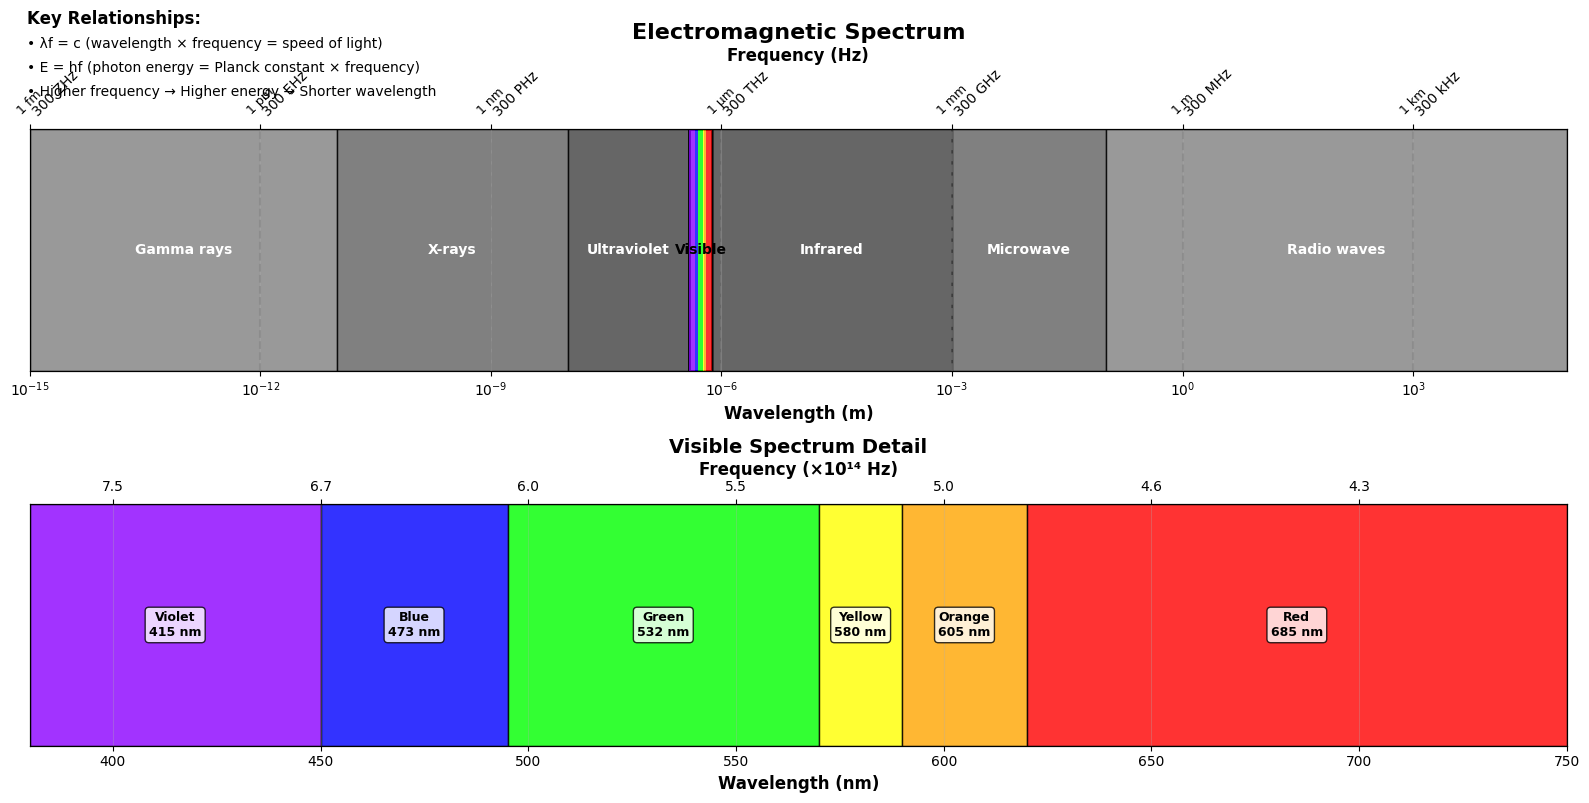

Electromagnetic Spectrum Reference Values:
Gamma rays:
  Wavelength: 1.0e-15 - 1.0e-11 m
  Frequency:  3.0e+19 - 3.0e+23 Hz

X-rays:
  Wavelength: 1.0e-11 - 1.0e-08 m
  Frequency:  3.0e+16 - 3.0e+19 Hz

Ultraviolet:
  Wavelength: 1.0e-08 - 3.8e-07 m
  Frequency:  7.9e+14 - 3.0e+16 Hz

Visible:
  Wavelength: 3.8e-07 - 7.5e-07 m
  Frequency:  4.0e+14 - 7.9e+14 Hz

Infrared:
  Wavelength: 7.5e-07 - 1.0e-03 m
  Frequency:  3.0e+11 - 4.0e+14 Hz

Microwave:
  Wavelength: 1.0e-03 - 1.0e-01 m
  Frequency:  3.0e+09 - 3.0e+11 Hz

Radio waves:
  Wavelength: 1.0e-01 - 1.0e+05 m
  Frequency:  3.0e+03 - 3.0e+09 Hz

Visible Spectrum Details:
Violet: 380 - 450 nm
Blue: 450 - 495 nm
Green: 495 - 570 nm
Yellow: 570 - 590 nm
Orange: 590 - 620 nm
Red: 620 - 750 nm


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Create figure with subplots
fig = plt.figure(figsize=(16, 8))

# Define the electromagnetic spectrum regions
# Wavelengths in meters
regions = {
    'Gamma rays': {'lambda_min': 1e-15, 'lambda_max': 1e-11, 'color': '#808080'},
    'X-rays': {'lambda_min': 1e-11, 'lambda_max': 1e-8, 'color': '#606060'},
    'Ultraviolet': {'lambda_min': 1e-8, 'lambda_max': 380e-9, 'color': '#404040'},
    'Visible': {'lambda_min': 380e-9, 'lambda_max': 750e-9, 'color': '#FFFFFF'},
    'Infrared': {'lambda_min': 750e-9, 'lambda_max': 1e-3, 'color': '#404040'},
    'Microwave': {'lambda_min': 1e-3, 'lambda_max': 1e-1, 'color': '#606060'},
    'Radio waves': {'lambda_min': 1e-1, 'lambda_max': 1e5, 'color': '#808080'}
}

# Visible spectrum colors for detailed view
visible_colors = {
    'Violet': {'lambda_min': 380e-9, 'lambda_max': 450e-9, 'color': '#8B00FF'},
    'Blue': {'lambda_min': 450e-9, 'lambda_max': 495e-9, 'color': '#0000FF'},
    'Green': {'lambda_min': 495e-9, 'lambda_max': 570e-9, 'color': '#00FF00'},
    'Yellow': {'lambda_min': 570e-9, 'lambda_max': 590e-9, 'color': '#FFFF00'},
    'Orange': {'lambda_min': 590e-9, 'lambda_max': 620e-9, 'color': '#FFA500'},
    'Red': {'lambda_min': 620e-9, 'lambda_max': 750e-9, 'color': '#FF0000'}
}

# Speed of light
c = 3e8  # m/s

# Main spectrum plot
ax1 = plt.subplot(2, 1, 1)

# Create wavelength array for the full spectrum
wavelengths = np.logspace(-15, 5, 1000)
frequencies = c / wavelengths

# Plot the spectrum bands
y_height = 1
for i, (name, props) in enumerate(regions.items()):
    lambda_min = props['lambda_min']
    lambda_max = props['lambda_max']
    color = props['color']

    if name == 'Visible':
        # Special handling for visible spectrum
        rect = Rectangle((lambda_min, 0), lambda_max - lambda_min, y_height,
                        facecolor='white', edgecolor='black', linewidth=2)
        ax1.add_patch(rect)

        # Add rainbow gradient for visible light
        for j, (vis_name, vis_props) in enumerate(visible_colors.items()):
            vis_rect = Rectangle((vis_props['lambda_min'], 0),
                               vis_props['lambda_max'] - vis_props['lambda_min'],
                               y_height, facecolor=vis_props['color'], alpha=0.8)
            ax1.add_patch(vis_rect)
    else:
        rect = Rectangle((lambda_min, 0), lambda_max - lambda_min, y_height,
                        facecolor=color, alpha=0.8, edgecolor='black')
        ax1.add_patch(rect)

    # Add labels
    center_lambda = np.sqrt(lambda_min * lambda_max)
    ax1.text(center_lambda, y_height/2, name, ha='center', va='center',
             fontsize=10, fontweight='bold',
             color='white' if name != 'Visible' else 'black')

ax1.set_xscale('log')
ax1.set_xlim(1e-15, 1e5)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Wavelength (m)', fontsize=12, fontweight='bold')
ax1.set_title('Electromagnetic Spectrum', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_yticks([])

# Add wavelength markers
wavelength_markers = [1e-15, 1e-12, 1e-9, 1e-6, 1e-3, 1, 1e3]
wavelength_labels = ['1 fm', '1 pm', '1 nm', '1 μm', '1 mm', '1 m', '1 km']
for wl, label in zip(wavelength_markers, wavelength_labels):
    if 1e-15 <= wl <= 1e5:
        ax1.axvline(x=wl, color='gray', linestyle='--', alpha=0.5)
        ax1.text(wl, 1.05, label, ha='center', va='bottom', rotation=45, fontsize=9)

# Add frequency axis on top
ax1_freq = ax1.twiny()
freq_ticks = c / np.array(wavelength_markers)
freq_labels = []
for f in freq_ticks:
    if f >= 1e24:
        freq_labels.append(f'{f/1e24:.0f} YHz')
    elif f >= 1e21:
        freq_labels.append(f'{f/1e21:.0f} ZHz')
    elif f >= 1e18:
        freq_labels.append(f'{f/1e18:.0f} EHz')
    elif f >= 1e15:
        freq_labels.append(f'{f/1e15:.0f} PHz')
    elif f >= 1e12:
        freq_labels.append(f'{f/1e12:.0f} THz')
    elif f >= 1e9:
        freq_labels.append(f'{f/1e9:.0f} GHz')
    elif f >= 1e6:
        freq_labels.append(f'{f/1e6:.0f} MHz')
    elif f >= 1e3:
        freq_labels.append(f'{f/1e3:.0f} kHz')
    else:
        freq_labels.append(f'{f:.0f} Hz')

ax1_freq.set_xscale('log')
ax1_freq.set_xlim(ax1.get_xlim())
ax1_freq.set_xticks(wavelength_markers)
ax1_freq.set_xticklabels(freq_labels, rotation=45, ha='left')
ax1_freq.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')

# Visible spectrum detail
ax2 = plt.subplot(2, 1, 2)

# Plot detailed visible spectrum
visible_wavelengths = np.linspace(380e-9, 750e-9, 1000)
visible_frequencies = c / visible_wavelengths

for name, props in visible_colors.items():
    lambda_min = props['lambda_min']
    lambda_max = props['lambda_max']
    color = props['color']

    rect = Rectangle((lambda_min*1e9, 0), (lambda_max - lambda_min)*1e9, 1,
                    facecolor=color, alpha=0.8, edgecolor='black')
    ax2.add_patch(rect)

    # Add wavelength labels
    center_lambda = (lambda_min + lambda_max) / 2
    ax2.text(center_lambda*1e9, 0.5, f'{name}\n{center_lambda*1e9:.0f} nm',
             ha='center', va='center', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

ax2.set_xlim(380, 750)
ax2.set_ylim(0, 1)
ax2.set_xlabel('Wavelength (nm)', fontsize=12, fontweight='bold')
ax2.set_title('Visible Spectrum Detail', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_yticks([])

# Add frequency axis for visible spectrum
ax2_freq = ax2.twiny()
visible_freq_ticks = np.array([400, 450, 500, 550, 600, 650, 700]) * 1e-9
visible_freq_values = c / visible_freq_ticks
visible_freq_labels = [f'{f/1e14:.1f}' for f in visible_freq_values]

ax2_freq.set_xlim(380, 750)
ax2_freq.set_xticks(visible_freq_ticks * 1e9)
ax2_freq.set_xticklabels(visible_freq_labels)
ax2_freq.set_xlabel('Frequency (×10¹⁴ Hz)', fontsize=12, fontweight='bold')

plt.tight_layout()

# Add some educational annotations
fig.text(0.02, 0.98, 'Key Relationships:', fontsize=12, fontweight='bold')
fig.text(0.02, 0.95, '• λf = c (wavelength × frequency = speed of light)', fontsize=10)
fig.text(0.02, 0.92, '• E = hf (photon energy = Planck constant × frequency)', fontsize=10)
fig.text(0.02, 0.89, '• Higher frequency → Higher energy → Shorter wavelength', fontsize=10)

plt.show()

# Print some useful values for reference
print("Electromagnetic Spectrum Reference Values:")
print("=" * 50)
for name, props in regions.items():
    lambda_min = props['lambda_min']
    lambda_max = props['lambda_max']
    freq_max = c / lambda_min
    freq_min = c / lambda_max
    print(f"{name}:")
    print(f"  Wavelength: {lambda_min:.1e} - {lambda_max:.1e} m")
    print(f"  Frequency:  {freq_min:.1e} - {freq_max:.1e} Hz")
    print()

print("Visible Spectrum Details:")
print("=" * 30)
for name, props in visible_colors.items():
    lambda_min = props['lambda_min']
    lambda_max = props['lambda_max']
    print(f"{name}: {lambda_min*1e9:.0f} - {lambda_max*1e9:.0f} nm")